# A Human Detection System

# [ 1 ] Using Machine Learning (HOG features+SVM)

In [3]:
!pip install numpy matplotlib scikit-learn opencv-python joblib

 # 1. Import Required Libraries

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# 2. Set Dataset Paths

In [7]:
# Path to positive and negative image folders
pos_path = "../data/pos_person"
neg_path = "../data/neg_person"

# 3. View Sample Images.

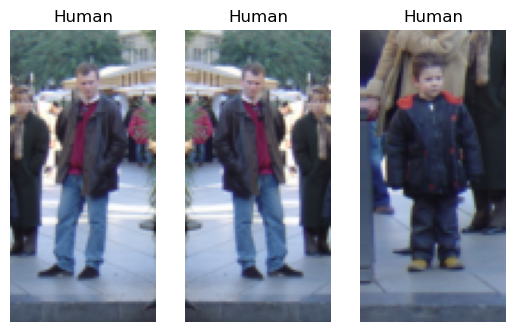

In [9]:
# Display a few positive images (humans)
pos_images = os.listdir(pos_path)
for i in range(3):
    img = cv2.imread(os.path.join(pos_path, pos_images[i]))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title("Human")
    plt.axis("off")
plt.show()


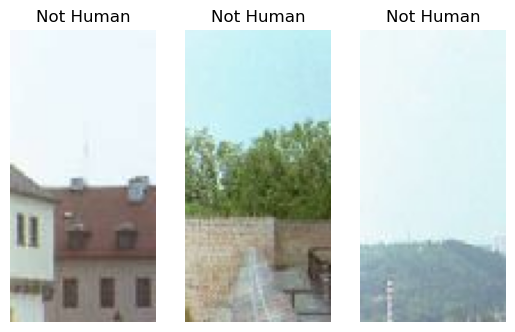

In [10]:
# Display a few negative images (non-humans)
neg_images = os.listdir(neg_path)
for i in range(3):
    img = cv2.imread(os.path.join(neg_path, neg_images[i]))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_rgb)
    plt.title("Not Human")
    plt.axis("off")
plt.show()

# 4. Prepare Dataset (Extract HOG Features)

In [12]:
# HOG Descriptor
hog = cv2.HOGDescriptor()
winSize = (64, 128)

X = []  # features
y = []  # labels

In [13]:
# Load and process positive images (Assiging label 1)
for img_name in os.listdir(pos_path):
    img_path = os.path.join(pos_path, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        continue
        
    img = cv2.resize(img, winSize)
    feature = hog.compute(img)
    X.append(feature.flatten())
    y.append(1)

In [14]:
# Load and process negative images (Assiging label 0)
for img_name in os.listdir(neg_path):
    img_path = os.path.join(neg_path, img_name)
    img = cv2.imread(img_path)
    
    if img is None:
        continue
        
    img = cv2.resize(img, winSize)
    feature = hog.compute(img)
    X.append(feature.flatten())
    y.append(0)

In [15]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

print("Feature shape:", X.shape)
print("Labels shape:", y.shape)

Feature shape: (6562, 3780)
Labels shape: (6562,)


 # 5. Train+Test Dataset Split.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training size:", len(X_train))
print("Testing size:", len(X_test))

Training size: 5249
Testing size: 1313


# 6. Train SVM Classifier

In [19]:
#Train using svm classifier
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

# 7. Evaluate the Model

In [21]:
y_pred = svm.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       830
           1       0.95      0.93      0.94       483

    accuracy                           0.96      1313
   macro avg       0.96      0.95      0.95      1313
weighted avg       0.96      0.96      0.96      1313

Confusion Matrix:
[[807  23]
 [ 33 450]]


# 8. Save the Model using pickel

In [23]:
joblib.dump(svm, "../model/svm_model.pkl")
print("Model saved to ../model/svm_model.pkl")

Model saved to ../model/svm_model.pkl


# 9. Prediction on a New Test Image

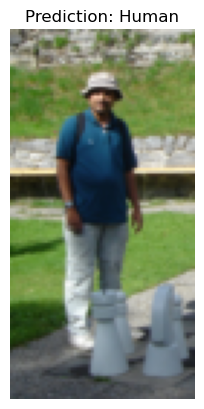

In [25]:
# Load saved model
svm_model = joblib.load("../model/svm_model.pkl")

# Load new test image
test_img_path = "../data/pos_person/crop001037b.png"  # replace with your test file
img = cv2.imread(test_img_path)
img_resized = cv2.resize(img, winSize)

# Extract HOG features
hog_features = hog.compute(img_resized).reshape(1, -1)

# Predict
prediction = svm_model.predict(hog_features)

# Display Result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title("Prediction: Human" if prediction[0] == 1 else "Prediction: Not Human")
plt.axis("off")
plt.show()

# 10: Prediction on Multiple Test Images

Processing: 4_1.jpg
Prediction: Not Human


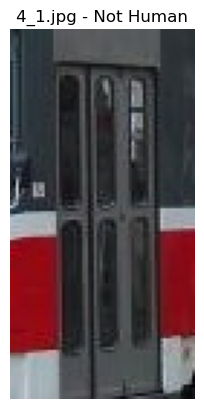

Processing: 6_0.jpg
Prediction: Not Human


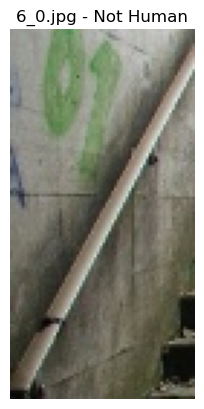

Processing: 6_1.jpg
Prediction: Not Human


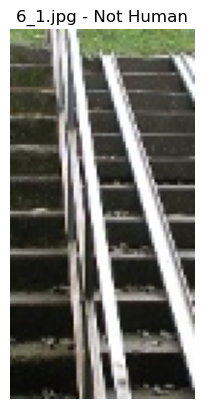

Processing: 6_13.jpg
Prediction: Not Human


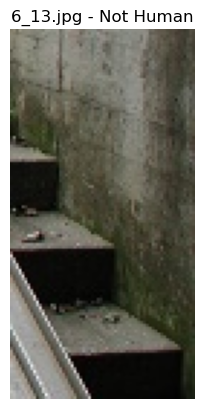

Processing: 6_14.jpg
Prediction: Not Human


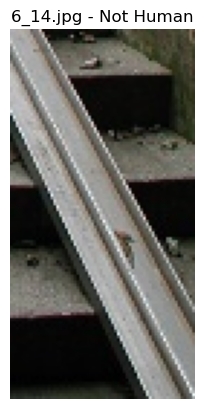

Processing: 7_9.jpg
Prediction: Not Human


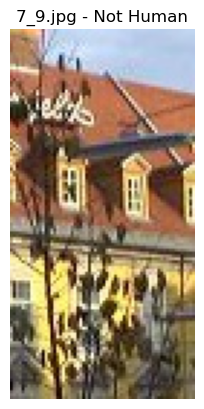

Processing: 9_6.jpg
Prediction: Not Human


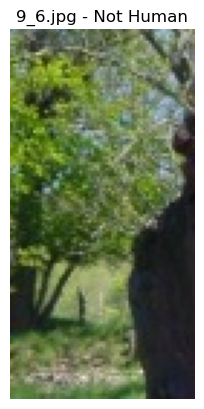

Processing: 00000006a.png
Prediction: Not Human


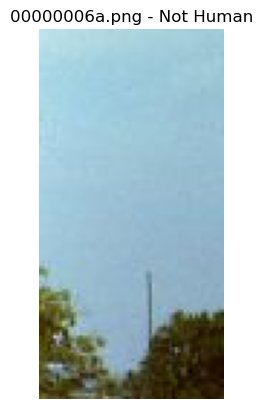

Processing: crop001037b.png
Prediction: Human


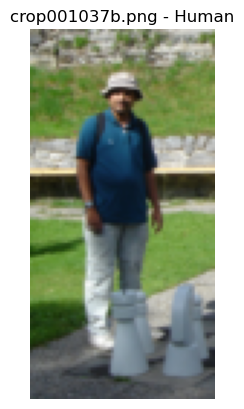

Processing: crop001047a.png
Prediction: Human


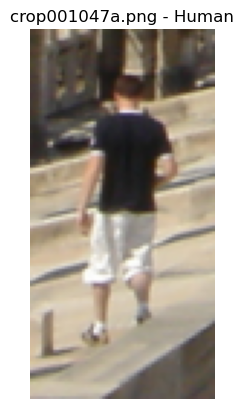

Processing: crop001047b.png
Prediction: Human


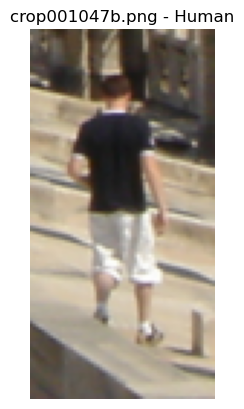

Processing: crop001048a.png
Prediction: Human


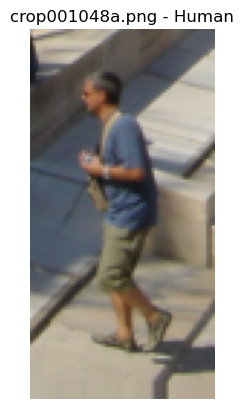

Processing: crop001051a.png
Prediction: Human


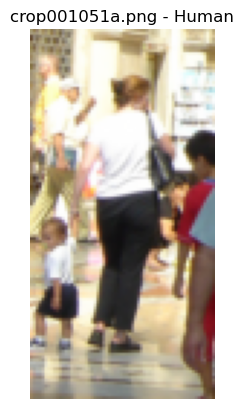

Processing: crop001055b.png
Prediction: Human


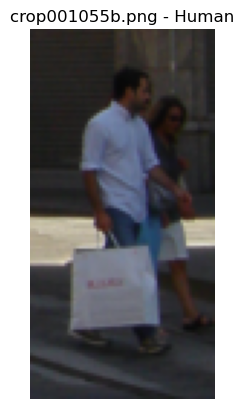

In [27]:
import glob

# Define path to test images (use multiple extensions)
test_image_files = glob.glob("../data/predictTestImages/*.jpg") + \
                   glob.glob("../data/predictTestImages/*.jpeg") + \
                   glob.glob("../data/predictTestImages/*.png")

# Load trained SVM model
svm_model = joblib.load("../model/svm_model.pkl")

# Loop through each test image
for image_path in test_image_files:
    print(f"Processing: {os.path.basename(image_path)}")
    
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("Failed to load image.")
        continue
    
    # Resize and extract HOG features
    img_resized = cv2.resize(img, winSize)
    hog_features = hog.compute(img_resized).reshape(1, -1)
    
    # Predict
    prediction = svm_model.predict(hog_features)
    
    # Show result
    label = "Human" if prediction[0] == 1 else "Not Human"
    print(f"Prediction: {label}")
    
    # Display image with title
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{os.path.basename(image_path)} - {label}")
    plt.axis("off")
    plt.show()

# A Human Detection System [ using svm_model.pkl classifier model]

In [29]:
!pip install imutils

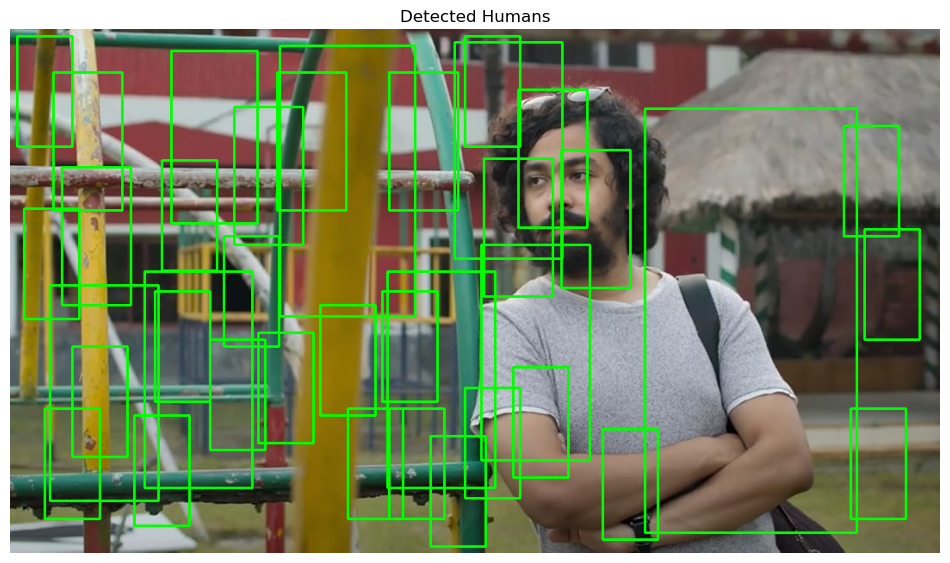

In [30]:
# -------------------------------------------------------------------
# Detect Human in a Full Image Using trained svm_model.pkl classifier
# -------------------------------------------------------------------

from imutils.object_detection import non_max_suppression

# Load the trained SVM model
model = joblib.load("../model/svm_model.pkl")

# Create HOG Descriptor with same window size used during training
hog = cv2.HOGDescriptor()
winSize = (64, 128)

# Load the large test image for detection
image_path = "../data/fullSizedTestImage/test1.jpg"  # Change this to your test image
original_image = cv2.imread(image_path)
image_to_draw = original_image.copy()  # Copy for drawing rectangles

# Set parameters for sliding window and image pyramid
step_size = 8         # move window by 8 pixels (horizontal and vertical)
scale_factor = 1.25   # image pyramid scaling factor

# Store rectangles and dummy confidences for NMS
rects = []
confidences = []

# Start pyramid scan from original image
resized = original_image.copy()
while True:
    # Get scaling ratio relative to original image
    scale = original_image.shape[1] / float(resized.shape[1])

    # Slide window over this resized image
    for y in range(0, resized.shape[0] - winSize[1], step_size):
        for x in range(0, resized.shape[1] - winSize[0], step_size):
            # Extract the current window patch
            window = resized[y:y + winSize[1], x:x + winSize[0]]
            
            # Skip if window size is not same as training
            if window.shape[0] != winSize[1] or window.shape[1] != winSize[0]:
                continue

            # Compute HOG features for the patch
            features = hog.compute(window).reshape(1, -1)
            
            # Predict using trained SVM model
            prediction = model.predict(features)

            if prediction[0] == 1:
                # Convert rectangle back to original image scale
                rect_x1 = int(x * scale)
                rect_y1 = int(y * scale)
                rect_x2 = int((x + winSize[0]) * scale)
                rect_y2 = int((y + winSize[1]) * scale)

                # Store detection rectangle and dummy confidence score
                rects.append([rect_x1, rect_y1, rect_x2, rect_y2])
                confidences.append(1.0)  # No real confidence from SVM

    # Prepare for next scale in pyramid
    w = int(resized.shape[1] / scale_factor)
    h = int(resized.shape[0] / scale_factor)
    resized = cv2.resize(resized, (w, h))

    # Break if image gets smaller than window
    if resized.shape[0] < winSize[1] or resized.shape[1] < winSize[0]:
        break

# Apply Non-Maximum Suppression to remove overlapping detections
final_rects = non_max_suppression(np.array(rects), probs=confidences, overlapThresh=0.3)

# Draw rectangles on image
for (x1, y1, x2, y2) in final_rects:
    cv2.rectangle(image_to_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show final image with detection boxes
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))
plt.title("Detected Humans")
plt.axis("off")
plt.show()